In [36]:
#!pip install  sentence-transformers
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer, util

In [49]:
data1 = pd.read_csv("data/pairs.csv")
data1

,Unnamed: 0,listing_id_1,listing_id_2,labels
0,0,120777696,116630376,1
1,1,120793420,121050028,1
2,2,118823311,111300261,1
3,3,112597318,102266138,0
4,4,72795989,68729895,1
...,...,...,...,...
8079,8079,64728987,121337856,0
8080,8080,94748057,64724703,0
8081,8081,49873544,99693231,0
8082,8082,106940156,102299455,1


In [46]:
data = pd.read_csv("data/text_sim.csv")

In [47]:
pd.set_option('display.max_colwidth', None)

In [55]:
data = pd.merge(data,data1)
data  = data[["listing_id_1","listing_id_2","text1","text2","labels"]]

<AxesSubplot: ylabel='Frequency'>

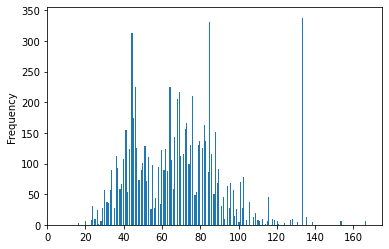

In [56]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in data["text1"]]

pd.Series(seq_len).plot.hist(bins = 500, xlim=(0,175))

In [33]:
sentences = ["** CONFLANS BORDS DE SEINE ** CADRE DE VIE IDYLLIQUE pour ce magnifique appartement 3 pièces dans une ANCIENNE maison MEULIÈRE du début du XXème siècle avec VUE PLONGEANTE sur la SEINE comp : Véranda avec vue sur SEINE, Dgt, Salle de bains avec WC, Cuisine, bureau, 2 chambres chacune avec placard et vue privilégiée sur la Seine. A cela s'ajoute un magnifique jardin de 128m² avec cette même vue plongeante. UN APPARTEMENT QUI NE RESTERA PAS LONGTEMPS DANS NOS VITRINES !!! A VOS TÉLÉPHONES ET CONTACTEZ L'AGENCE DAVRIL POUR PRENDRE RENDEZ-VOUS AVANT QU'IL NE SOIT TROP TARD 0645987682", "REFERENCE - 210063 Appartement de type F3 situé en bords de Seine comprenant, entrée véranda, 2 chambres lumineuses avec placards, un bureau, une cuisine et un cellier, une salle de bains avec WC. Bâtiment équipé de la fibre optique. Proches des commodités et des écoles ainsi qu'à 300 mètres des transports en communs reliant la gare de Pontoise (RER A et Ligne L Paris Saint Lazare). Les plus : Copropriété avec piscine, jardin privatif de plus de 100 m² et environnement très calme. Statut : Copropriété Nombre de lots : 4 lots à usage d'habitation Procédures en cours : Aucunes Charges annuelles : 240€ DPE D / GES C Quentin FARGEAS numéro SIREN 824019442 | Préfecture de Pontoise (95)"]

In [34]:
model = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

#Compute embedding for both lists
embedding_1= model.encode(sentences[0], convert_to_tensor=True)
embedding_2 = model.encode(sentences[1], convert_to_tensor=True)

util.pytorch_cos_sim(embedding_1, embedding_2)

tensor([[0.7345]])

In [57]:
pred = []
for i in range(len(data)):
    #Compute embedding for both lists
    embedding_1= model.encode(data["text1"][i], convert_to_tensor=True)
    embedding_2 = model.encode(data["text2"][i], convert_to_tensor=True)

    pred.append(util.pytorch_cos_sim(embedding_1, embedding_2))

In [58]:
data["pred"] = pred

In [62]:
data.head(60)

,listing_id_1,listing_id_2,text1,text2,labels,pred
0,120777696,116630376,"*** CONFLANS SAINTE HONORINE - 10MIN GARE SNCF *** Situé au CALME d'une résidence SECURISEE avec GARDIEN, cet appartement vous propose : vaste entrée avec PLACARDS desservant un séjour avec DOUBLE EXPOSITION et une grande cuisine. L'espace nuit se compose de trois chambres LUMINEUSES, d'une salle de bain et un wc indépendant. En plus de ses NOMBREUX RANGEMENTS, l'appartement dispose d'une place de parking privative et d'une grande cave. Une visite s'impose! Bien soumis à la copropriété ( 119 lots ) charges courantes annuelles de 3000 €","*** CONFLANS SAINTE HONORINE - 10MIN GARE SNCF *** Situé au CALME d'une résidence SECURISEE avec GARDIEN, cet appartement vous propose : vaste entrée avec PLACARDS desservant un séjour avec DOUBLE EXPOSITION et une grande cuisine. L'espace nuit se compose de trois chambres LUMINEUSES, d'une salle de bain et un wc indépendant. En plus de ses NOMBREUX RANGEMENTS, l'appartement dispose d'une place de parking privative et d'une grande cave. Une visite s'impose!",1,[[tensor(1.0000)]]
1,120793420,121050028,"REFERENCE - 210063 Appartement de type F3 situé en bords de Seine comprenant, entrée véranda, 2 chambres lumineuses avec placards, un bureau, une cuisine et un cellier, une salle de bains avec WC. Bâtiment équipé de la fibre optique. Proches des commodités et des écoles ainsi qu'à 300 mètres des transports en communs reliant la gare de Pontoise (RER A et Ligne L Paris Saint Lazare). Les plus : Copropriété avec piscine, jardin privatif de plus de 100 m² et environnement très calme. Statut : Copropriété Nombre de lots : 4 lots à usage d'habitation Procédures en cours : Aucunes Charges annuelles : 240€ DPE D / GES C Quentin FARGEAS numéro SIREN 824019442 | Préfecture de Pontoise (95)","** CONFLANS BORDS DE SEINE ** CADRE DE VIE IDYLLIQUE pour ce magnifique appartement 3 pièces dans une ANCIENNE maison MEULIÈRE du début du XXème siècle avec VUE PLONGEANTE sur la SEINE comp : Véranda avec vue sur SEINE, Dgt, Salle de bains avec WC, Cuisine, bureau, 2 chambres chacune avec placard et vue privilégiée sur la Seine. A cela s'ajoute un magnifique jardin de 128m² avec cette même vue plongeante. UN APPARTEMENT QUI NE RESTERA PAS LONGTEMPS DANS NOS VITRINES !!! A VOS TÉLÉPHONES ET CONTACTEZ L'AGENCE DAVRIL POUR PRENDRE RENDEZ-VOUS AVANT QU'IL NE SOIT TROP TARD 0645987682",1,[[tensor(0.7345)]]
2,118823311,111300261,"F3 NEUF à Conflans Ste Honorine 78700 Appartement de type F3 57,4m² au premier étage dans une construction neuve. Situé proche de toutes commodités dans le quartier de Chennevières, à 15 minutes à pied de la gare. Salon, salle à manger, cuisine US, 2 chambres, salle d'eau, wc. Chauffage au gaz, chaudière individuelle, 2 places de parking couvertes. Normes RT2012 possibilité PTZ. FRAIS DE NOTAIRES OFFERTS<br>Copropriété de 25 lots (). <br><br> Charges annuelles : 600 euros.","Dans le quartier privilégié du vieux village, proche de toutes commodités. Dans une résidence de standing (RT2012) de 9 logements. Un appartement de type F3 comprenant : entrée, séjour avec coin cuisine, deux chambres, salle d'eau et wc. Une place de parking intérieur.<br /> Idéale première acquisition ou investissement locatif, possibilité de bénéficier du PTZ et loi de défiscalisation.<br /> A Visiter d’urgence ! <br /> AP : 01.39.72.04.20",1,[[tensor(0.7130)]]
3,112597318,102266138,"** AGENCE WEELODGE CONFLANS ** Proche écoles et commerces, venez découvrire ce MAGNIFIQUE F4 dans une résidence calme et familiale. Il comprend une entrée, un séjour de 20m² LUMINEUX avec BALCON, une cuisine équipée avec LOGGIA, 3 BELLES chambres avec rangements, une salle de bain et WC séparés. Pour compléter les prestations, vous disposez également d'une cave et d'une place de parking numérotée. AUCUN travaux à prévoir !! Contactez vite votre AGENCE WEELODGE CONFLANS au 01 39 65 13 00 !!","* AGENCE WEELODGE * EXCLUSIVITE ! A 2 PAS DES ECOLES ET DU CENTRE AQUATIQUE, superb

In [61]:
data[["listing_id_1","listing_id_2", "labels", "pred"]].to_csv("results_text.csv")

In [66]:
data[["listing_id_1","listing_id_2", "labels", "pred"]].head(20)

,listing_id_1,listing_id_2,labels,pred
0,120777696,116630376,1,[[tensor(1.0000)]]
1,120793420,121050028,1,[[tensor(0.7345)]]
2,118823311,111300261,1,[[tensor(0.7130)]]
3,112597318,102266138,0,[[tensor(0.6553)]]
4,72795989,68729895,1,[[tensor(0.9986)]]
5,116948417,118789539,1,[[tensor(0.9472)]]
6,119253235,35030927,0,[[tensor(0.2783)]]
7,71958413,64731203,0,[[tensor(0.5571)]]
8,115234728,116548598,1,[[tensor(1.)]]
9,122684207,118198070,0,[[tensor(0.4381)]]
